In [1]:
!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
%matplotlib inline
import re 

# Gathering the dataset

In [3]:
# Import the Twitter archive CSV file into a DataFrame
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url, auth=('user', 'pass'))

In [5]:
# Check if the code request code is ok 
response.status_code

200

In [6]:
response.encoding

'utf-8'

In [7]:

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [8]:
# Import the tweet image predictions TSV file into a DataFrame
image_df = pd.read_csv('image_predictions.tsv', sep='\t') 
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [11]:
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        line = json.loads(line)
        print(line)
        break

In [12]:
# saving the json file as csv

tweet_json = pd.read_json('tweet-json.txt', lines = True)
tweet_json.to_csv('tweets.csv', index=False)


In [13]:
tweet = pd.read_csv('tweets.csv')
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Assessing the dataset 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [17]:
df.duplicated().sum()

0

In [18]:
image_df.duplicated().sum()

0

In [19]:
tweet.duplicated().sum()

0

In [20]:
df.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [21]:
df.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [22]:
df[df.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


### **Tidiness issues**

1) column headers such as doggo, floofer, pupper, and puppo in df dataset are values not variable names. 

2) favorite_count, retweet_count and the image_df dataset should be part of the df dataset.

### **Quality issues**

**Df dataset**
1) rating_numerator and rating_denominator have extremely large and inconsistent values

2) Name feature has invalid records such as "a", "an", "the", and "bo."

3) Delete columns with null values.

4) Data in the source column includes URL.

5) Delete the null values in the expanded_urls column.

6) Extract the ratings from text column.

7) Remove retweets, i.e all records where retweeted_status_id is not null.

**Image_df dataset** 

8) Columns p1, p2 and p3 should be merged as a single column.

9) Some breed name begins with upper case while others with lower case.

# **Cleaning Process**

This section cleans all the issues documented above. All copies of the datasets were created for referece purposed. The cleaning process includes merging individual pieces of data according to the rules of tidy data.


In [24]:
# Make copies of original pieces of data
df_clean = df.copy()
image_df_clean = image_df.copy()
tweet_clean = tweet.copy()

### Tidiness issue

**1) Column headers such as doggo, floofer, pupper, and puppo in df dataset are values not variable names.**

**Define**

Merge column headers "doggo," "floofer," "pupper," and "puppo" in to one column called dog_stage. 

**Code**

In [25]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
# create a new column 'dog_stage'
df_clean['dog_stage'] = ''
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean['dog_stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [27]:
# replace the none values
df_clean['dog_stage'] = df_clean['dog_stage'].apply(lambda x: x.replace('None',''))
df_clean['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [28]:
df_clean['dog_stage'] = df_clean['dog_stage'].apply(lambda x: x.replace('doggopupper', 'doggo, pupper'))
df_clean['dog_stage'] = df_clean['dog_stage'].apply(lambda x: x.replace('doggopuppo', 'doggo, puppo'))
df_clean['dog_stage'] = df_clean['dog_stage'].apply(lambda x: x.replace('doggofloofer', 'doggo, floofer'))

In [29]:
df_clean.drop(columns=['doggo', 'pupper', 'floofer', 'puppo'], inplace=True)

**Test**

In [30]:
df_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [31]:
list(df_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

**2) favorite_count, retweet_count and the image_df dataset should be part of the df dataset.**

**Define**

Merge the favorite_count, retweet_count and the image_df dataset together with the df dataset


**Code**

In [32]:
# select the id, retweet_count and favorite_count column in the tweet dataset
tweet_clean = tweet_clean[['id','retweet_count','favorite_count']]

In [33]:
# rename the id column
tweet_clean.rename(columns= {"id":"tweet_id"},inplace=True)

In [34]:
# meger the tables together
df_clean = pd.merge(df_clean, tweet_clean, on=['tweet_id'], how='inner')
df_clean = pd.merge(df_clean, image_df_clean, on=['tweet_id'], how='inner')

**Test**

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   2073 

### Quality issue

**1) rating_numerator and rating_denominator have extremely large and inconsistent values.**

**Define**

Perform feature engineering (where: rating = rating_numerator / rating_denominator)

**Code**

In [36]:
# create column for rating
df_clean['rating'] = df_clean['rating_numerator']/df_clean['rating_denominator']

**Test**

In [37]:
# check for feature engineering
assert 'rating' in df_clean.columns

In [38]:
# check for feature engineering creation
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
1586,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,...,vizsla,0.519589,True,miniature_pinscher,0.064771,True,Rhodesian_ridgeback,0.061491,True,1.1
950,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,...,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True,1.2
1189,698907974262222848,NaN,NaN,2016-02-14 16:33:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is never sure if he's doing the right...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698907974...,...,German_short-haired_pointer,0.983131,True,bluetick,0.005558,True,curly-coated_retriever,0.003322,True,1.0
1212,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,...,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True,1.2
1107,706265994973601792,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,...,papillon,0.743715,True,Pekinese,0.114042,True,Saint_Bernard,0.047715,True,1.1


**2) Name feature has invlaid records such as "a", "an", "the", and "bo."**

**Define**

Replace  names starting with words such as a, an, the, and bo with None.

**Code**

In [39]:
df_clean.name = df_clean.name.apply(lambda x: 'None' if x[0].islower() else x)

**Test**

In [40]:
assert df_clean.name.apply(lambda x: x[0].isupper()).all()

**3) Data in source column includes url.**

**Define**

Remove url from tweet source 

**Code**

In [41]:
df_clean['source'] = df_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test**

In [42]:
df_clean.source.values

array(['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for iPhone', 'Twitter for iPhone',
       'Twitter for iPhone'], dtype=object)

In [43]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


**4) Delete columns with null values.**

**Define**

Drop columns such as the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

**Code**

In [44]:
drop_column = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp']
df_clean.drop(drop_column, axis=1, inplace=True)

**Test**

In [45]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3


**5) Delete the null values in the expanded_urls column.**

**Define**

Filter and drop nan values

**Code**

In [46]:
df_clean = df_clean[~df_clean['expanded_urls'].isna()]

**Test**

In [47]:
df_clean['expanded_urls'].isna().sum()

0

**6) Extract the ratings from text column**

**Define**

Filter the correct ratings for each tweet.

**Code**

In [48]:
rating = df_clean.text.str.extractall(r'(\d+\.\d+\/\d+)|(\d+\/\d+)').reset_index().drop_duplicates('level_0')
rating = rating.melt(value_vars=[0,1],id_vars='level_0', value_name='ratings').dropna().drop('variable', axis=1)

df_clean = df_clean.reset_index()
df_clean = df_clean.merge(rating, left_on='index', right_on='level_0')

**Test**

In [49]:
df_clean['ratings'].value_counts()

12/10       473
10/10       429
11/10       413
13/10       283
9/10        150
8/10         95
7/10         51
14/10        40
5/10         33
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
0/10          2
121/110       1
143/130       1
60/50         1
44/40         1
11.26/10      1
7/11          1
80/80         1
144/120       1
88/80         1
420/10        1
45/50         1
1776/10       1
99/90         1
50/50         1
4/20          1
204/170       1
9/11          1
165/150       1
11.27/10      1
9.75/10       1
24/7          1
84/70         1
15/10         1
13.5/10       1
1/2           1
Name: ratings, dtype: int64

**7) Remove retweets**

**Define** 

Remove retweets, i.e., all records where retweeted_status_id is not null

**Code**

In [53]:
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


df['pattern'] = df['text'].apply(get_pattern)
df['fraction'] = df['rating_numerator'].astype(str) + '/' + df['rating_denominator'].astype(str)

**Test**

In [56]:
df[df['pattern'] != df['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


**8) Columns p1, p2 and p3 should be merged as a single column.**

**Define** 

Select the highest confidence and TRUE values from the three prediction data 

**Code**

In [57]:
# order of confidence value is sorted, p1_conf > p2_conf > p3_conf
# create an empty list to save the choices for each row in the dataset
dog_breed = []
confidence = []

# function to iteerate through the image_df_clean dataframe to find the highest confidence and true
def breed_determiner(ram):
    if ram.p1_dog == True:
        dog_breed.append(ram.p1)
        confidence.append(ram.p1_conf)
    elif ram.p2_dog == True:
        dog_breed.append(ram.p2)
        confidence.append(ram.p2_conf)
    elif ram.p3_dog == True:
        dog_breed.append(ram.p3)
        confidence.append(ram.p3_conf)
    else:
        dog_breed.append('Unpredicted')
        confidence.append(0)
    
df_clean.apply(breed_determiner, axis=1) 


df_clean['dog_breed'] = dog_breed
df_clean['confidence'] = confidence


In [58]:
# drop the excess columns
column_drop = ['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

df_clean.drop(column_drop, axis=1, inplace=True)

**Test**

In [59]:
assert df_clean.columns.any() not in column_drop

In [61]:
df_clean.head(2)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,rating,level_0,ratings,dog_breed,confidence
0,0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.3,0,13/10,Unpredicted,0.000000
1,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,1,13/10,Chihuahua,0.323581


**9) Some breed name begins with upper case while others with lower case.**

**Define**

replace '_' with ' ' in dog_breed column and convert the starting letter in the from lower case to upper case for consistency.

**Code**

In [62]:
# replace '_' with empty space
df_clean.dog_breed = df_clean.dog_breed.str.replace('_',' ')

In [63]:
# check for dog_breed with '-'
df_clean[df_clean.dog_breed.str.contains('-')].dog_breed.unique()

array(['German short-haired pointer', 'flat-coated retriever',
       'black-and-tan coonhound', 'soft-coated wheaten terrier',
       'curly-coated retriever', 'wire-haired fox terrier', 'Shih-Tzu'],
      dtype=object)

In [64]:
# replace '-' with ' ' in unique dog_breed
conditions = [df_clean.dog_breed == 'German Short-Haired Pointer',
             df_clean.dog_breed == 'Flat-Coated Retriever',
             df_clean.dog_breed == 'Black-And-Tan Coonhound',
             df_clean.dog_breed == 'Soft-Coated Wheaten Terrier',
             df_clean.dog_breed == 'Curly-Coated Retriever',
             df_clean.dog_breed == 'Wire-Haired Fox Terrier',
             df_clean.dog_breed == 'Shih-Tzu']
choices = ['German Short Haired Pointer',
          'Flat Coated Retriever',
          'Black and Tan Coonhound',
          'Soft Coated Wheaten Terrier',
          'Curly Coated Retriever',
          'Wire Haired Fox Terrier',
          'Shih-Tzu']

df_clean.dog_breed = np.select(conditions, choices, default=df_clean.dog_breed)

**Test**

In [65]:
df_clean.dog_breed.unique()

array(['Unpredicted', 'Chihuahua', 'Labrador retriever', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky',
       'Mexican hairless', 'kuvasz', 'pug', 'Blenheim spaniel',
       'malamute', 'Italian greyhound', 'chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'miniature pinscher', 'German short-haired pointer',
       'English springer', 'vizsla', 'Irish setter', 'bloodhound',
       'Bernese mountain dog', 'West Highland white terrier',
       'cocker spaniel', 'flat-coated retriever', 'Cardigan',
       'Newfoundland', 'Shetland sheepdog', 'komondor', 'kelpie',
       'Greater Swiss Mountain dog', 'Border collie', 'bull mastiff',
       'Staffordshire bullterrier', 'Lakeland terrier',
       'Australian terrier', 'Bouvier des Flandres', 'Bedlington terrier',
       'Boston bull', 'Old English sheepdo

# Storing data

Storing the gathered, assessed and cleaned data to a csv file

In [66]:
df_2 = df_clean.copy()

## Analyzing and Visualizing Data

This section analyses and visualizes the wranggled data to answer the following question: 
    
1) What source is mostly used for tweeting?

2) What is the relationship between retweet and favorite count?

3) What are the top 20 most tweeted dog breed?


In [67]:
df_2.head(5)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,rating,level_0,ratings,dog_breed,confidence
0,0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.3,0,13/10,Unpredicted,0.000000
1,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,1,13/10,Chihuahua,0.323581
2,2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,2,12/10,Chihuahua,0.716012
3,3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3,3,13/10,Labrador retriever,0.168086
4,4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1.2,4,12/10,basset,0.555712


In [68]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2073 non-null   int64  
 1   tweet_id            2073 non-null   int64  
 2   timestamp           2073 non-null   object 
 3   source              2073 non-null   object 
 4   text                2073 non-null   object 
 5   expanded_urls       2073 non-null   object 
 6   rating_numerator    2073 non-null   int64  
 7   rating_denominator  2073 non-null   int64  
 8   name                2073 non-null   object 
 9   dog_stage           2073 non-null   object 
 10  retweet_count       2073 non-null   int64  
 11  favorite_count      2073 non-null   int64  
 12  jpg_url             2073 non-null   object 
 13  rating              2073 non-null   float64
 14  level_0             2073 non-null   int64  
 15  ratings             2073 non-null   object 
 16  dog_br

In [69]:
df_2.describe()

,index,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,level_0,confidence
count,2073.000000,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,1036.000000,7.383634e+17,12.265798,10.511819,2976.089243,8556.718283,1.169987,1036.000000,0.463326
std,598.567874,6.780118e+16,40.699924,7.180517,5054.897526,12098.640994,3.988880,598.567874,0.339142
min,0.000000,6.660209e+17,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,518.000000,6.764706e+17,10.000000,10.000000,634.000000,1674.000000,1.000000,518.000000,0.139909
50%,1036.000000,7.119681e+17,11.000000,10.000000,1408.000000,3864.000000,1.100000,1036.000000,0.457117
75%,1554.000000,7.931959e+17,12.000000,10.000000,3443.000000,10937.000000,1.200000,1554.000000,0.772685
max,2072.000000,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,177.600000,2072.000000,0.999956


**1) What source is mostly used for tweeting based on average favorite and retweet counts.**

In [70]:
df_2['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

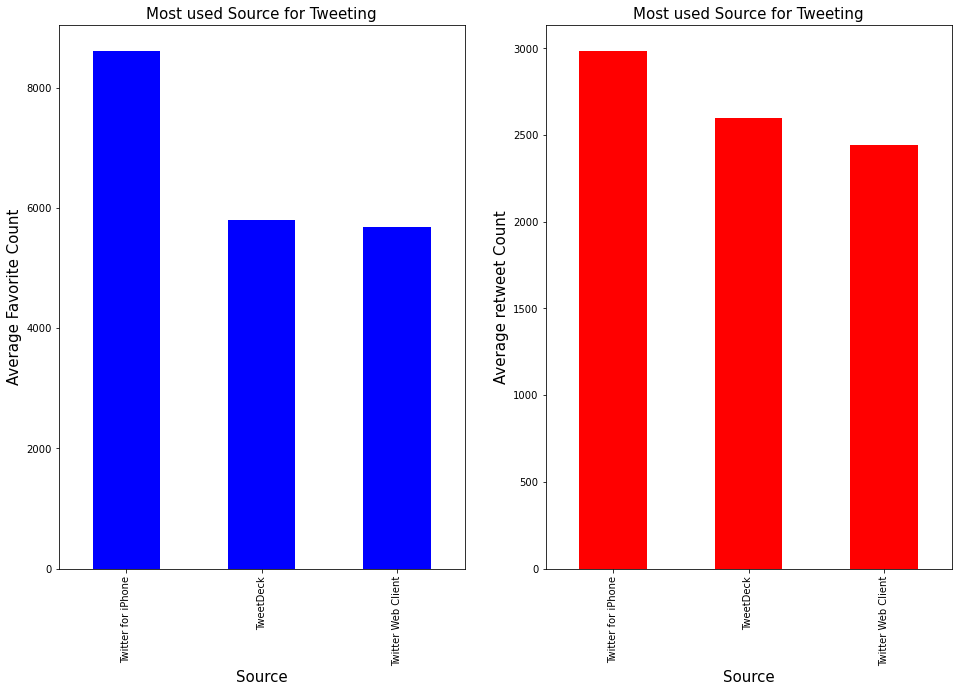

In [71]:
plt.subplot(1,2,1)
df_2.groupby('source').favorite_count.mean().sort_values(ascending=False).plot(kind='bar',color='blue',figsize=(16,10))
plt.title('Most used Source for Tweeting',fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Average Favorite Count',fontsize=15)
plt.savefig('most used source favorite Count.jpg', bbox_inches='tight', dpi=300);

# plot most used source for retweet
plt.subplot(1,2,2)
df_2.groupby('source').retweet_count.mean().sort_values(ascending=False).plot(kind='bar',color='red', figsize=(16,10))
plt.title('Most used Source for Tweeting',fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Average retweet Count',fontsize=15)
plt.savefig('Most used source retweet Count.jpg', bbox_inches='tight', dpi=300);

Observation:
    
For tweets based on favorite and retweet count, it can be observed that the source, Twitter for iPhone, has the greatest count, followed by TweetDeck, then Twitter Web Client.

**2) What is the relationship between retweet and favorite count.**

In [72]:
df_2[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.790476
favorite_count,0.790476,1.000000


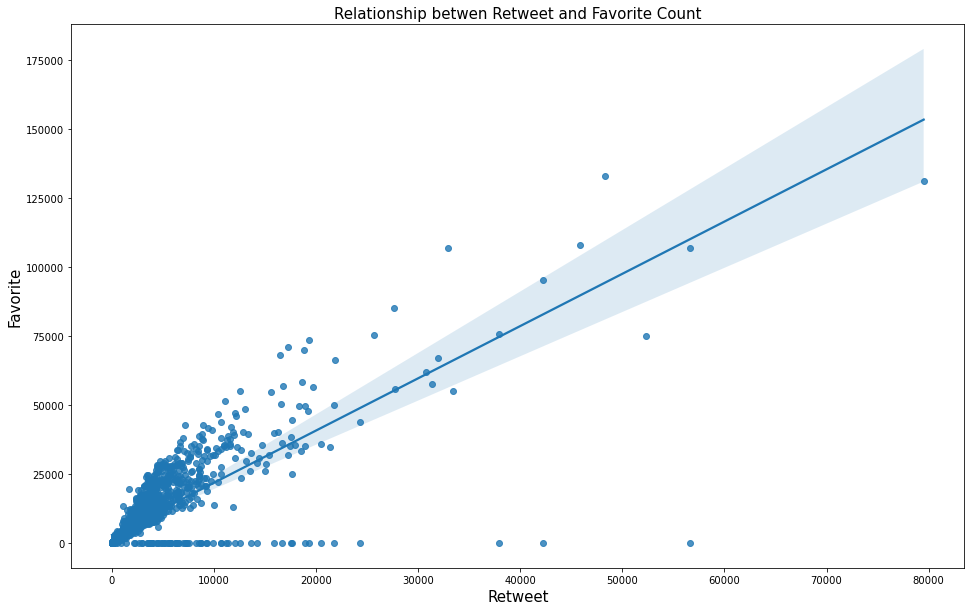

In [73]:
plt.figure(figsize=(16,10))
sns.regplot(x=df_2.retweet_count, y=df_2.favorite_count)
plt.title('Relationship betwen Retweet and Favorite Count', fontsize=15)
plt.xlabel('Retweet', fontsize=15)
plt.ylabel('Favorite', fontsize=15);
plt.savefig('crl retweet & fav.jpg', bbox_inches='tight', dpi=300);

Observation:

It can be observed that, to some extent, retweet and favorite counts are highly correlated. 

**3) What is top 20 most tweeted dog breeds.**

In [74]:
breed_name = df_2.query('dog_breed != "Unpredicted"')

result = breed_name.groupby('dog_breed').count().rating.sort_values(ascending=True).nlargest(20)
result

dog_breed
golden retriever             173
Labrador retriever           113
Chihuahua                     95
Pembroke                      95
pug                           65
toy poodle                    52
chow                          51
Samoyed                       46
Pomeranian                    42
malamute                      34
cocker spaniel                34
French bulldog                32
Chesapeake Bay retriever      31
miniature pinscher            26
Cardigan                      23
Staffordshire bullterrier     22
Eskimo dog                    22
German shepherd               21
beagle                        21
Shih-Tzu                      20
Name: rating, dtype: int64

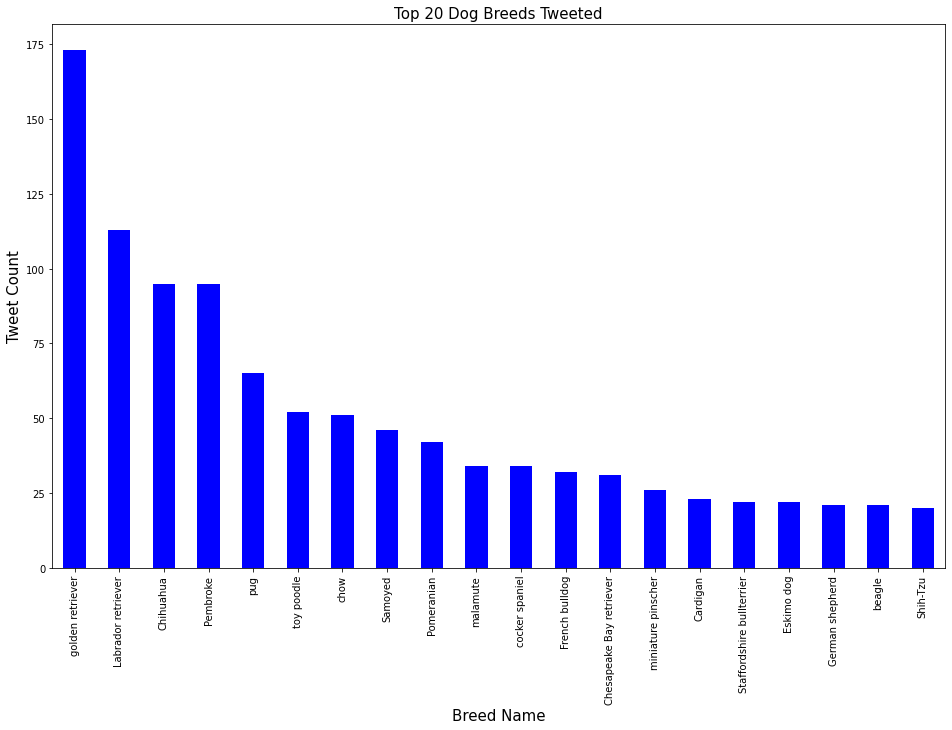

In [75]:
plt.figure(figsize=(16,10))
result.plot(kind='bar', color='blue')
plt.title('Top 20 Dog Breeds Tweeted',fontsize=15)
plt.ylabel('Tweet Count', fontsize=15)
plt.xlabel('Breed Name',fontsize=15)
plt.savefig('dog breeds.jpg', bbox_inches='tight', dpi=300);

Observation:

The bar chart above shows the top 20 dog breed tweeted, with the golden retriever having a significantly high value of 173 tweets.

# Conclusion

After assessing and cleaning the dataset the following can be concluded:

* Twitter for iPhones was the major source for tweeting for both favorite and retweet counts.
* Favorite and retweet counts are highly correlated.
* The golden retriever has a significantly high tweet value


# Limitation

* Most of the dog names were not captured in the dataset
* Some dogs have multiple stages
* Most columns in the dataset had null values